In [1]:
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
df=pd.read_csv("C:\\Users\\AMULYA GAJE\\Downloads\\archive (3)\\Wholesale customers data.csv")

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [7]:
selected_features = [
    "Fresh", "Milk", "Grocery",
    "Frozen", "Detergents_Paper", "Delicassen"
]

X = df[selected_features]


In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [9]:
X_scaled=scaler.fit_transform(X)

In [10]:
from sklearn.cluster import KMeans

k_values = range(2, 11)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


c:\Users\AMULYA GAJE\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\AMULYA GAJE\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\AMULYA GAJE\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\AMULYA GAJE\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\AMULYA GAJE\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht

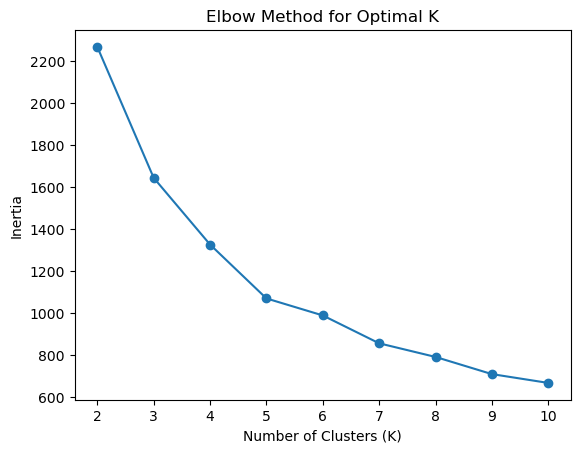

In [11]:
import matplotlib.pyplot as plt

plt.plot(k_values, inertia, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


In [12]:
# Choose optimal K (example: 4)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df["Cluster"] = clusters


c:\Users\AMULYA GAJE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


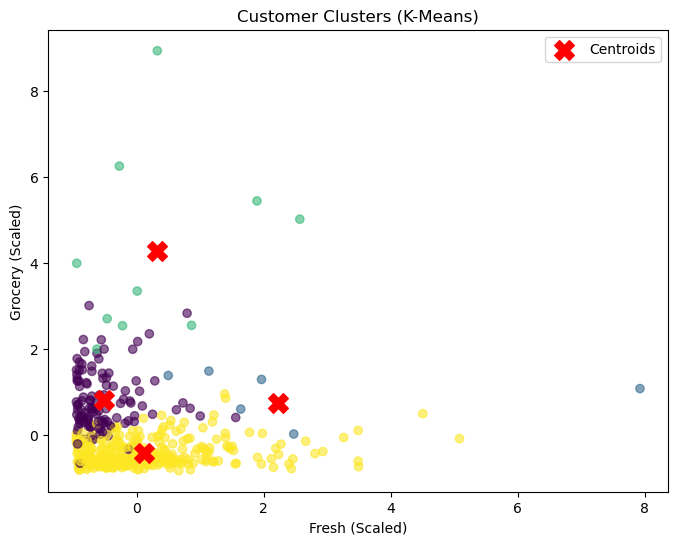

In [13]:
plt.figure(figsize=(8, 6))

plt.scatter(
    X_scaled[:, 0], X_scaled[:, 2],
    c=clusters, cmap="viridis", alpha=0.6
)

centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, 0], centers[:, 2],
    c="red", s=200, marker="X", label="Centroids"
)

plt.xlabel("Fresh (Scaled)")
plt.ylabel("Grocery (Scaled)")
plt.title("Customer Clusters (K-Means)")
plt.legend()
plt.show()


In [15]:
cluster_profile = df.groupby("Cluster")[selected_features].mean()
print(cluster_profile)
for cluster in cluster_profile.index:
    print(f"\nCluster {cluster}")
    print(cluster_profile.loc[cluster])



                Fresh          Milk       Grocery        Frozen  \
Cluster                                                           
0         5474.926606  10194.192661  15587.807339   1464.385321   
1        40136.857143  19452.142857  15026.285714  23713.714286   
2        15964.900000  34708.500000  48536.900000   3054.600000   
3        13511.964968   3044.394904   3850.121019   3170.350318   

         Detergents_Paper    Delicassen  
Cluster                                  
0             6734.642202   1642.458716  
1             2374.142857  15735.142857  
2            24875.200000   2942.800000  
3              854.808917   1122.105096  

Cluster 0
Fresh                5474.926606
Milk                10194.192661
Grocery             15587.807339
Frozen               1464.385321
Detergents_Paper     6734.642202
Delicassen           1642.458716
Name: 0, dtype: float64

Cluster 1
Fresh               40136.857143
Milk                19452.142857
Grocery             15026.285714
Fr